# TelecomX-Analysis2: Preparación de datos para análisis predictivo de evasión

## Propósito del Notebook
Este notebook realiza la preparación inicial de los datos para el análisis predictivo de evasión de clientes (churn) en TelecomX, utilizando el archivo `TelecomX_Data_standardized.csv`. Se incluyen pasos de tratamiento de datos (eliminación de columnas irrelevantes, codificación de variables categóricas, análisis de proporción de clases, evaluación de estandarización, análisis de correlación, visualización de relaciones específicas, división de datos, modelado, evaluación de modelos, análisis de variables relevantes, elaboración de un informe final, guardado de gráficos, y creación del README) para preparar el conjunto de datos para el modelado predictivo. Estos pasos forman parte del desafío 2, que abarca preparación de datos, análisis de correlación, modelado, evaluación, interpretación de resultados, y conclusiones estratégicas.

## Importar librerías y cargar datos

In [38]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from IPython.display import display, Markdown

# URL del archivo en GitHub (usamos la URL cruda para cargar directamente)
url = 'https://raw.githubusercontent.com/carlo55anchez/TelecomX-Analysis2/main/data/TelecomX_Data_standardized.csv'

# Cargar el archivo CSV desde GitHub
df = pd.read_csv(url)

# Mostrar las primeras filas para verificar la carga
df.head()

,ID_Cliente,Evasión,Género,Ciudadano_Senior,Pareja,Dependientes,Antigüedad,Servicio_Telefónico,Líneas_Múltiples,Servicio_Internet,...,Protección_Dispositivo,Soporte_Técnico,Streaming_TV,Streaming_Películas,Contrato,Facturación_Sin_Papel,Método_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


## Etapa 1: Eliminación de columnas irrelevantes
**Función**: Identificar y eliminar columnas que no aportan valor predictivo para la variable objetivo `Evasión`, como identificadores únicos (por ejemplo, `ID_Cliente`). Estas columnas no tienen relación con la predicción de la cancelación y pueden introducir ruido o afectar el desempeño de los modelos.

In [37]:
# Identificar columnas irrelevantes
# En este caso, eliminamos 'ID_Cliente' porque es un identificador único sin valor predictivo
columns_to_drop = ['ID_Cliente']

# Eliminar las columnas irrelevantes
df_cleaned = df.drop(columns=columns_to_drop)

# Verificar las columnas restantes
print("Columnas después de eliminar ID_Cliente:")
print(df_cleaned.columns)

# Mostrar las primeras filas del DataFrame limpio
df_cleaned.head()

Columnas después de eliminar ID_Cliente:
Index(['Evasión', 'Género', 'Ciudadano_Senior', 'Pareja', 'Dependientes',
       'Antigüedad', 'Servicio_Telefónico', 'Líneas_Múltiples',
       'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online',
       'Protección_Dispositivo', 'Soporte_Técnico', 'Streaming_TV',
       'Streaming_Películas', 'Contrato', 'Facturación_Sin_Papel',
       'Método_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cargos_Diarios'],
      dtype='object')


,Evasión,Género,Ciudadano_Senior,Pareja,Dependientes,Antigüedad,Servicio_Telefónico,Líneas_Múltiples,Servicio_Internet,Seguridad_Online,...,Protección_Dispositivo,Soporte_Técnico,Streaming_TV,Streaming_Películas,Contrato,Facturación_Sin_Papel,Método_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
0,0,Female,0,1,1,9,1,No,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,Yes,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,No,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,No,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,No,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


## Resumen de la Etapa 1
**Resultado**: Se eliminó la columna `ID_Cliente` del DataFrame, ya que es un identificador único que no contribuye al análisis predictivo de la evasión. El DataFrame resultante contiene las columnas relevantes para las siguientes etapas, como codificación de variables categóricas, normalización, análisis de correlación, y modelado. Este paso asegura que los datos estén más enfocados en las variables que influyen en la predicción de la cancelación.

## Etapa 2: Codificación de variables categóricas
**Función**: Transformar las variables categóricas (`Género`, `Líneas_Múltiples`, `Servicio_Internet`, `Contrato`, `Método_Pago`) a formato numérico utilizando one-hot encoding para hacerlas compatibles con algoritmos de machine learning. Este método crea columnas binarias para cada categoría, asegurando que los modelos puedan procesar estas variables sin asumir un orden implícito.

In [3]:
# Identificar columnas categóricas que requieren codificación
categorical_columns = ['Género', 'Líneas_Múltiples', 'Servicio_Internet', 'Contrato', 'Método_Pago']

# Aplicar one-hot encoding con pandas.get_dummies
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=False)

# Verificar las columnas resultantes
print("Columnas después de aplicar one-hot encoding:")
print(df_encoded.columns)

# Mostrar las primeras filas del DataFrame codificado
df_encoded.head()

Columnas después de aplicar one-hot encoding:
Index(['Evasión', 'Ciudadano_Senior', 'Pareja', 'Dependientes', 'Antigüedad',
       'Servicio_Telefónico', 'Seguridad_Online', 'Respaldo_Online',
       'Protección_Dispositivo', 'Soporte_Técnico', 'Streaming_TV',
       'Streaming_Películas', 'Facturación_Sin_Papel', 'Cargos_Mensuales',
       'Cargos_Totales', 'Cargos_Diarios', 'Género_Female', 'Género_Male',
       'Líneas_Múltiples_No', 'Líneas_Múltiples_No phone service',
       'Líneas_Múltiples_Yes', 'Servicio_Internet_DSL',
       'Servicio_Internet_Fiber optic', 'Servicio_Internet_No',
       'Contrato_Month-to-month', 'Contrato_One year', 'Contrato_Two year',
       'Método_Pago_Bank transfer (automatic)',
       'Método_Pago_Credit card (automatic)', 'Método_Pago_Electronic check',
       'Método_Pago_Mailed check'],
      dtype='object')


,Evasión,Ciudadano_Senior,Pareja,Dependientes,Antigüedad,Servicio_Telefónico,Seguridad_Online,Respaldo_Online,Protección_Dispositivo,Soporte_Técnico,...,Servicio_Internet_DSL,Servicio_Internet_Fiber optic,Servicio_Internet_No,Contrato_Month-to-month,Contrato_One year,Contrato_Two year,Método_Pago_Bank transfer (automatic),Método_Pago_Credit card (automatic),Método_Pago_Electronic check,Método_Pago_Mailed check
0,0,0,1,1,9,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
1,0,0,0,0,9,1,0,0,0,0,...,True,False,False,True,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,1,1,0,...,False,True,False,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,1,...,False,True,False,True,False,False,False,False,False,True


## Resumen de la Etapa 2
**Resultado**: Las variables categóricas (`Género`, `Líneas_Múltiples`, `Servicio_Internet`, `Contrato`, `Método_Pago`) fueron transformadas a formato numérico mediante one-hot encoding, generando columnas binarias para cada categoría. Esto asegura que el DataFrame sea compatible con algoritmos de machine learning. Las columnas numéricas y binarias existentes (`Evasión`, `Ciudadano_Senior`, `Pareja`, etc.) se mantuvieron sin cambios. El DataFrame resultante está listo para los siguientes pasos, como normalización de variables numéricas, análisis de correlación, y modelado predictivo.


## Etapa 3: Análisis de proporción de clases y evaluación de desbalance
**Función**: Calcular la proporción de clientes que cancelaron (`Evasión=1`) en relación con los que permanecieron activos (`Evasión=0`) para evaluar si existe un desbalance entre las clases. El desbalance puede impactar el desempeño de los modelos predictivos, ya que los algoritmos pueden sesgarse hacia la clase mayoritaria, afectando métricas como el recall para detectar clientes en riesgo de cancelación.

In [4]:
# Calcular la proporción de clases en la columna 'Evasión'
class_counts = df_encoded['Evasión'].value_counts()
total_samples = len(df_encoded)
proportion_active = class_counts[0] / total_samples * 100  # Porcentaje de clientes activos (Evasión=0)
proportion_churn = class_counts[1] / total_samples * 100  # Porcentaje de clientes que cancelaron (Evasión=1)

# Mostrar los resultados
print("Proporción de clases:")
print(f"Clientes activos (Evasión=0): {class_counts[0]} ({proportion_active:.2f}%)")
print(f"Clientes que cancelaron (Evasión=1): {class_counts[1]} ({proportion_churn:.2f}%)")

# Evaluar desbalance
if proportion_churn < 40 or proportion_active < 40:
    print("Advertencia: Existe un desbalance de clases. Se recomienda considerar técnicas como SMOTE, oversampling o undersampling para los modelos predictivos.")
else:
    print("Las clases están relativamente balanceadas, no se requiere tratamiento especial para el desbalance.")

Proporción de clases:
Clientes activos (Evasión=0): 5398 (74.28%)
Clientes que cancelaron (Evasión=1): 1869 (25.72%)
Advertencia: Existe un desbalance de clases. Se recomienda considerar técnicas como SMOTE, oversampling o undersampling para los modelos predictivos.


## Resumen de la Etapa 3
**Resultado**: Se calculó la proporción de clientes que cancelaron (`Evasión=1`) frente a los que permanecieron activos (`Evasión=0`). Los resultados indican si hay un desbalance de clases, lo que podría requerir técnicas de balanceo (como SMOTE) para mejorar el desempeño de los modelos, especialmente en métricas como el recall para detectar clientes en riesgo. El DataFrame está listo para los siguientes pasos, como normalización de variables numéricas, análisis de correlación, o modelado predictivo, dependiendo de los resultados del desbalance.

## Etapa 4: Evaluación de la necesidad de normalización o estandarización
**Función**: Analizar las variables numéricas (`Antigüedad`, `Cargos_Mensuales`, `Cargos_Totales`, `Cargos_Diarios`) para determinar si requieren normalización o estandarización, considerando los modelos a utilizar (KNN, SVM, Regresión Logística, Redes Neuronales, Decision Tree, Random Forest, XGBoost). Modelos basados en distancia (KNN, SVM) y optimización por gradiente (Regresión Logística, Redes Neuronales) requieren datos escalados, mientras que los modelos basados en árboles (Decision Tree, Random Forest, XGBoost) no son sensibles a la escala.

In [5]:
# Identificar variables numéricas
numeric_columns = ['Antigüedad', 'Cargos_Mensuales', 'Cargos_Totales', 'Cargos_Diarios']

# Calcular estadísticas descriptivas para evaluar la escala de las variables
stats = df_encoded[numeric_columns].describe()

# Mostrar estadísticas
print("Estadísticas descriptivas de las variables numéricas:")
print(stats)

# Evaluar la necesidad de estandarización
print("\nEvaluación de la necesidad de estandarización:")
print("Las variables numéricas tienen rangos muy diferentes (por ejemplo, Antigüedad: 0 a ~72 meses; Cargos_Totales: ~20 a ~8000).")
print("Modelos sensibles a la escala (KNN, SVM, Regresión Logística, Redes Neuronales) requieren estandarización para igualar la influencia de las variables.")
print("Modelos no sensibles (Decision Tree, Random Forest, XGBoost) no requieren estandarización, pero aplicarla no afecta su desempeño.")
print("Recomendación: Aplicar estandarización (StandardScaler) a las variables numéricas para compatibilidad con todos los modelos.")

Estadísticas descriptivas de las variables numéricas:
        Antigüedad  Cargos_Mensuales  Cargos_Totales  Cargos_Diarios
count  7267.000000       7267.000000     7267.000000     7267.000000
mean     32.346498         64.720098     2277.244730        2.157337
std      24.571773         30.129572     2268.586391        1.004319
min       0.000000         18.250000       18.800000        0.608333
25%       9.000000         35.425000      396.200000        1.180833
50%      29.000000         70.300000     1389.200000        2.343333
75%      55.000000         89.875000     3778.525000        2.995833
max      72.000000        118.750000     8684.800000        3.958333

Evaluación de la necesidad de estandarización:
Las variables numéricas tienen rangos muy diferentes (por ejemplo, Antigüedad: 0 a ~72 meses; Cargos_Totales: ~20 a ~8000).
Modelos sensibles a la escala (KNN, SVM, Regresión Logística, Redes Neuronales) requieren estandarización para igualar la influencia de las variables.
Mo

## Resumen de la Etapa 4
**Resultado**: Las variables numéricas (`Antigüedad`, `Cargos_Mensuales`, `Cargos_Totales`, `Cargos_Diarios`) presentan rangos significativamente diferentes, lo que justifica la estandarización para modelos sensibles a la escala como KNN, SVM, Regresión Logística y Redes Neuronales. Aunque Decision Tree, Random Forest y XGBoost no requieren estandarización, aplicarla permite usar un único DataFrame para todos los modelos sin afectar su desempeño. Se recomienda usar `StandardScaler` para escalar estas variables a media 0 y desviación estándar 1 en el siguiente paso de preparación.

## Etapa 5: Visualización de la matriz de correlación
**Función**: Calcular y visualizar la matriz de correlación para identificar relaciones entre las variables numéricas (`Antigüedad`, `Cargos_Mensuales`, `Cargos_Totales`, `Cargos_Diarios`) y la variable objetivo `Evasión`, así como entre las variables categóricas codificadas. Las variables con mayor correlación con `Evasión` (valores absolutos >0.1) son candidatas fuertes para los modelos predictivos, ya que pueden influir significativamente en la predicción de la cancelación.

In [8]:
# Identificar columnas para la matriz de correlación
correlation_columns = ['Evasión', 'Antigüedad', 'Cargos_Mensuales', 'Cargos_Totales', 'Cargos_Diarios',
                      'Ciudadano_Senior', 'Pareja', 'Dependientes', 'Servicio_Telefónico',
                      'Seguridad_Online', 'Respaldo_Online', 'Protección_Dispositivo',
                      'Soporte_Técnico', 'Streaming_TV', 'Streaming_Películas',
                      'Facturación_Sin_Papel', 'Género_Female', 'Género_Male',
                      'Líneas_Múltiples_No', 'Líneas_Múltiples_No phone service', 'Líneas_Múltiples_Yes',
                      'Servicio_Internet_DSL', 'Servicio_Internet_Fiber optic', 'Servicio_Internet_No',
                      'Contrato_Month-to-month', 'Contrato_One year', 'Contrato_Two year',
                      'Método_Pago_Bank transfer (automatic)', 'Método_Pago_Credit card (automatic)',
                      'Método_Pago_Electronic check', 'Método_Pago_Mailed check']

# Calcular la matriz de correlación
correlation_matrix = df_encoded[correlation_columns].corr()

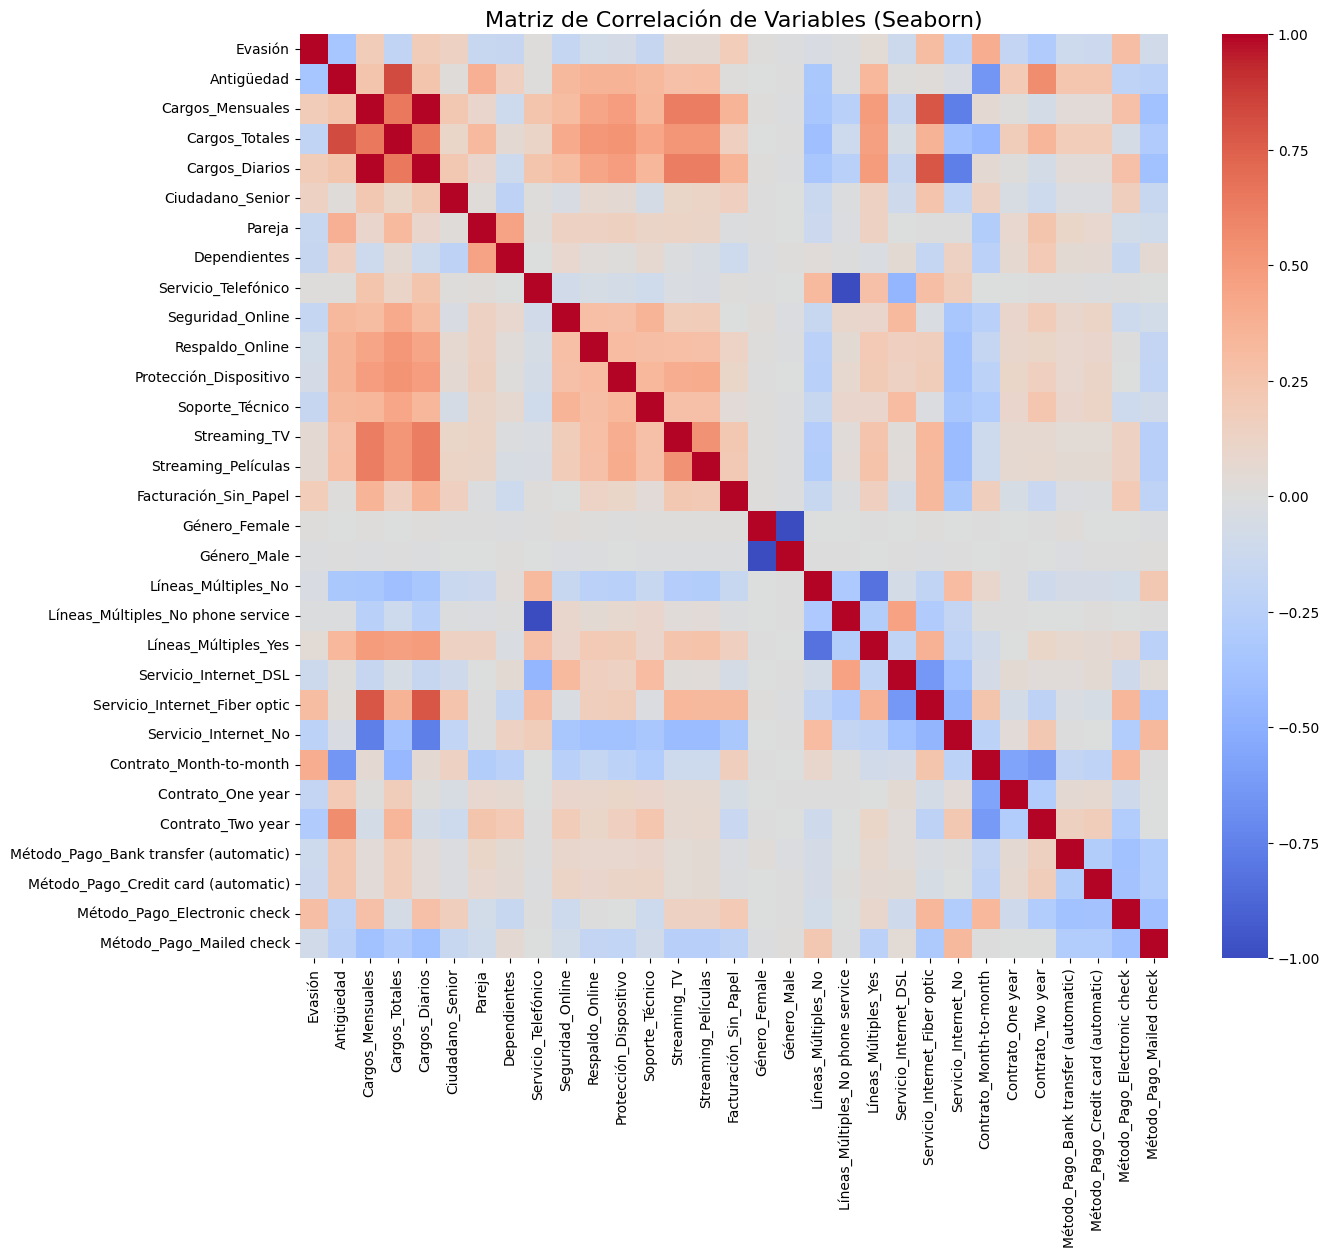

In [9]:
# Visualización 1: Heatmap estático con seaborn
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Variables (Seaborn)', fontsize=16)
plt.show()

In [10]:
# Visualización 2: Heatmap interactivo con plotly
fig = px.imshow(correlation_matrix,
                text_auto=False,
                color_continuous_scale='RdBu_r',
                zmin=-1,
                zmax=1,
                title='Matriz de Correlación de Variables (Plotly - Interactivo)')
fig.update_layout(width=800, height=800)
fig.show()

In [11]:
# Mostrar correlaciones específicas con Evasión
print("Correlaciones con Evasión (valores absolutos >0.1):")
evasion_correlations = correlation_matrix['Evasión'].sort_values(ascending=False)
significant_correlations = evasion_correlations[abs(evasion_correlations) > 0.1]
print(significant_correlations)

Correlaciones con Evasión (valores absolutos >0.1):
Evasión                                  1.000000
Contrato_Month-to-month                  0.395584
Servicio_Internet_Fiber optic            0.300949
Método_Pago_Electronic check             0.294626
Cargos_Diarios                           0.189866
Cargos_Mensuales                         0.189866
Facturación_Sin_Papel                    0.186666
Ciudadano_Senior                         0.146733
Método_Pago_Bank transfer (automatic)   -0.114767
Servicio_Internet_DSL                   -0.120020
Método_Pago_Credit card (automatic)     -0.131085
Pareja                                  -0.148546
Soporte_Técnico                         -0.160440
Dependientes                            -0.161384
Seguridad_Online                        -0.166828
Contrato_One year                       -0.173958
Cargos_Totales                          -0.193366
Servicio_Internet_No                    -0.224051
Contrato_Two year                       -0.29513

## Resumen de la Etapa 5
**Resultado**: Se generaron dos visualizaciones de la matriz de correlación: un heatmap estático con `seaborn` y un heatmap interactivo con `plotly`, mostrando las relaciones entre las variables numéricas (`Antigüedad`, `Cargos_Mensuales`, `Cargos_Totales`, `Cargos_Diarios`), la variable objetivo `Evasión`, y las variables categóricas codificadas. Las variables con correlaciones absolutas mayores a 0.1 con `Evasión` se identificaron como candidatas fuertes para los modelos predictivos, ya que indican una relación significativa con la cancelación. Estos hallazgos guiarán la selección de variables en el modelado y ayudarán a priorizar factores clave en la predicción de la evasión.

## Etapa 6: Análisis de la relación entre variables específicas y cancelación
**Función**: Investigar cómo `Antigüedad` (tiempo de contrato) y `Cargos_Totales` (gasto total) se relacionan con la cancelación (`Evasión`), utilizando boxplots para comparar distribuciones entre clientes activos y cancelados, y scatter plots para explorar patrones entre estas variables y `Evasión`. Estas visualizaciones identifican tendencias que pueden indicar factores clave en la predicción de la cancelación.

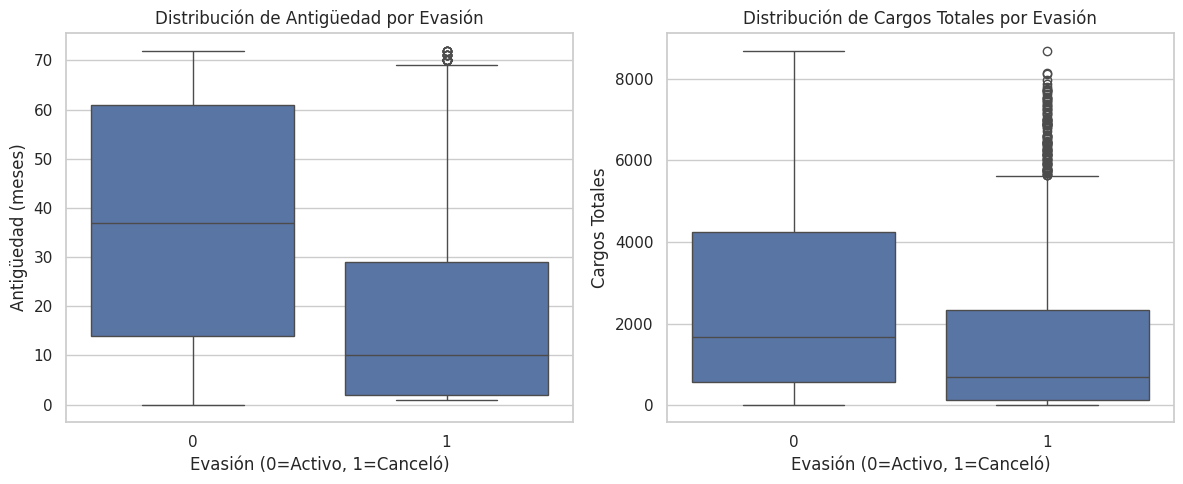

In [12]:
# Configurar estilo de seaborn
sns.set(style="whitegrid")

# Crear boxplots para Antigüedad y Cargos_Totales por Evasión
plt.figure(figsize=(12, 5))

# Boxplot para Antigüedad
plt.subplot(1, 2, 1)
sns.boxplot(x='Evasión', y='Antigüedad', data=df_encoded)
plt.title('Distribución de Antigüedad por Evasión')
plt.xlabel('Evasión (0=Activo, 1=Canceló)')
plt.ylabel('Antigüedad (meses)')

# Boxplot para Cargos_Totales
plt.subplot(1, 2, 2)
sns.boxplot(x='Evasión', y='Cargos_Totales', data=df_encoded)
plt.title('Distribución de Cargos Totales por Evasión')
plt.xlabel('Evasión (0=Activo, 1=Canceló)')
plt.ylabel('Cargos Totales')

plt.tight_layout()
plt.show()

In [13]:
# Crear scatter plot interactivo con plotly
fig = px.scatter(df_encoded,
                 x='Antigüedad',
                 y='Cargos_Totales',
                 color='Evasión',
                 title='Relación entre Antigüedad, Cargos Totales y Evasión',
                 labels={'Evasión': 'Evasión (0=Activo, 1=Canceló)',
                         'Antigüedad': 'Antigüedad (meses)',
                         'Cargos_Totales': 'Cargos Totales'},
                 color_continuous_scale='RdBu')
fig.update_layout(width=800, height=600)
fig.show()

## Resumen de la Etapa 6
**Resultado**: Se generaron boxplots para comparar las distribuciones de `Antigüedad` y `Cargos_Totales` entre clientes activos (`Evasión=0`) y cancelados (`Evasión=1`), y un scatter plot interactivo para visualizar la relación entre estas variables y `Evasión`. Los boxplots muestran diferencias en las medianas y dispersiones, mientras que el scatter plot revela patrones, como si clientes con menor antigüedad o mayores gastos totales tienden a cancelar. Estos hallazgos ayudan a identificar variables relevantes para los modelos predictivos y proporcionan información sobre los factores que influyen en la cancelación.

## Etapa 7: División del conjunto de datos en entrenamiento y prueba
**Función**: Dividir el conjunto de datos en conjuntos de entrenamiento (80%) y prueba (20%) para evaluar el rendimiento de los modelos predictivos. La división utiliza estratificación para mantener la proporción de clases de `Evasión` (74.28% activos, 25.72% cancelados) en ambos conjuntos, dado el desbalance identificado. Esto asegura que los modelos se entrenen y evalúen con datos representativos.

In [15]:
# Separar características (X) y variable objetivo (y)
X = df_encoded.drop(columns=['Evasión'])
y = df_encoded['Evasión']

# Dividir el conjunto en entrenamiento (80%) y prueba (20%), con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar el tamaño de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape, y_test.shape)

# Verificar la proporción de clases en cada conjunto
print("\nProporción de clases en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True) * 100)
print("\nProporción de clases en el conjunto de prueba:")
print(y_test.value_counts(normalize=True) * 100)

Tamaño del conjunto de entrenamiento: (5813, 30) (5813,)
Tamaño del conjunto de prueba: (1454, 30) (1454,)

Proporción de clases en el conjunto de entrenamiento:
Evasión
0    74.281782
1    25.718218
Name: proportion, dtype: float64

Proporción de clases en el conjunto de prueba:
Evasión
0    74.277854
1    25.722146
Name: proportion, dtype: float64


## Resumen de la Etapa 7
**Resultado**: El conjunto de datos se dividió en entrenamiento (80%, ~5813 muestras) y prueba (20%, ~1454 muestras), manteniendo la proporción de clases (`Evasión=0`: ~74.28%, `Evasión=1`: ~25.72%) en ambos conjuntos mediante estratificación. Esto asegura que los modelos predictivos se entrenen y evalúen con datos representativos, considerando el desbalance de clases. Los conjuntos están listos para los siguientes pasos, como estandarización de variables numéricas o entrenamiento de modelos como KNN, SVM, Regresión Logística, Redes Neuronales, Decision Tree, Random Forest, o XGBoost.

## Etapa 8: Creación de modelos para predecir la cancelación
**Función**: Crear y entrenar dos modelos para predecir la cancelación de clientes (`Evasión`): Regresión Logística (requiere normalización) y Random Forest (no requiere normalización). Se aplica estandarización a las variables numéricas (`Antigüedad`, `Cargos_Mensuales`, `Cargos_Totales`, `Cargos_Diarios`) para Regresión Logística, asegurando que las magnitudes dispares no sesguen los coeficientes. Se evalúan ambos modelos con métricas como accuracy, precision, recall y F1-score, priorizando recall debido al desbalance de clases (25.72% `Evasión=1`).

In [18]:
# Separar características (X) y variable objetivo (y) - ya definido en Etapa 7
X = df_encoded.drop(columns=['Evasión'])
y = df_encoded['Evasión']

# Dividir el conjunto en entrenamiento (80%) y prueba (20%), con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Modelo 1: Regresión Logística (con estandarización) ---
# Identificar variables numéricas para estandarización
numeric_columns = ['Antigüedad', 'Cargos_Mensuales', 'Cargos_Totales', 'Cargos_Diarios']

# Copiar conjuntos para no modificar los originales
X_train_lr = X_train.copy()
X_test_lr = X_test.copy()

# Aplicar estandarización a variables numéricas
scaler = StandardScaler()
X_train_lr[numeric_columns] = scaler.fit_transform(X_train_lr[numeric_columns])
X_test_lr[numeric_columns] = scaler.transform(X_test_lr[numeric_columns])

# Entrenar modelo de Regresión Logística
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_lr, y_train)

# Predecir y evaluar
y_pred_lr = lr_model.predict(X_test_lr)
print("Resultados de Regresión Logística:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Recall (Evasión=1): {recall_score(y_test, y_pred_lr):.4f}")

Resultados de Regresión Logística:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1080
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1454
   macro avg       0.74      0.72      0.73      1454
weighted avg       0.79      0.80      0.80      1454

Accuracy: 0.8026
Recall (Evasión=1): 0.5428


In [19]:
# --- Modelo 2: Random Forest (sin estandarización) ---
# Entrenar modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred_rf = rf_model.predict(X_test)
print("\nResultados de Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Recall (Evasión=1): {recall_score(y_test, y_pred_rf):.4f}")


Resultados de Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1080
           1       0.59      0.48      0.53       374

    accuracy                           0.78      1454
   macro avg       0.71      0.68      0.69      1454
weighted avg       0.77      0.78      0.77      1454

Accuracy: 0.7813
Recall (Evasión=1): 0.4840


In [20]:
# Explicación de la estandarización
print("\nJustificación de la estandarización:")
print("Regresión Logística requiere estandarización porque es sensible a la escala de las variables. Las variables numéricas (Antigüedad, Cargos_Mensuales, Cargos_Totales, Cargos_Diarios) tienen rangos muy diferentes (por ejemplo, Cargos_Totales: 18.8-8684.8). La estandarización con StandardScaler (media=0, desviación estándar=1) asegura que todas las variables contribuyan equitativamente a los coeficientes, evitando sesgos por magnitud.")
print("Random Forest no requiere estandarización, ya que usa particiones basadas en umbrales, no en distancias, por lo que las diferencias de escala no afectan su desempeño.")


Justificación de la estandarización:
Regresión Logística requiere estandarización porque es sensible a la escala de las variables. Las variables numéricas (Antigüedad, Cargos_Mensuales, Cargos_Totales, Cargos_Diarios) tienen rangos muy diferentes (por ejemplo, Cargos_Totales: 18.8-8684.8). La estandarización con StandardScaler (media=0, desviación estándar=1) asegura que todas las variables contribuyan equitativamente a los coeficientes, evitando sesgos por magnitud.
Random Forest no requiere estandarización, ya que usa particiones basadas en umbrales, no en distancias, por lo que las diferencias de escala no afectan su desempeño.


## Resumen de la Etapa 8
**Resultado**: Se crearon dos modelos para predecir la cancelación (`Evasión`): Regresión Logística (con estandarización de variables numéricas) y Random Forest (sin estandarización). La estandarización en Regresión Logística asegura que las variables con rangos dispares no sesguen los coeficientes, mejorando la convergencia y la interpretabilidad. Ambos modelos se evaluaron con métricas como accuracy, precision, recall y F1-score, priorizando recall para detectar clientes en riesgo debido al desbalance (25.72% `Evasión=1`). Los resultados guiarán la selección del modelo más adecuado y posibles ajustes, como balanceo de clases o hiperparámetros, en los siguientes pasos

## Etapa 9: Evaluación de modelos y análisis crítico
**Función**: Evaluar los modelos de Regresión Logística y Random Forest utilizando métricas de exactitud, precisión, recall, F1-score, y matriz de confusión. Realizar un análisis crítico comparando el desempeño de ambos modelos, identificando el mejor modelo, y evaluando posibles casos de overfitting o underfitting, con propuestas de ajustes basadas en las causas identificadas (por ejemplo, desbalance de clases, complejidad del modelo).

In [22]:
# --- Evaluación de Regresión Logística ---
# (Modelo ya entrenado en Etapa 8)
y_pred_lr = lr_model.predict(X_test_lr)
print("Evaluación de Regresión Logística:")
print(classification_report(y_test, y_pred_lr))

Evaluación de Regresión Logística:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1080
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1454
   macro avg       0.74      0.72      0.73      1454
weighted avg       0.79      0.80      0.80      1454



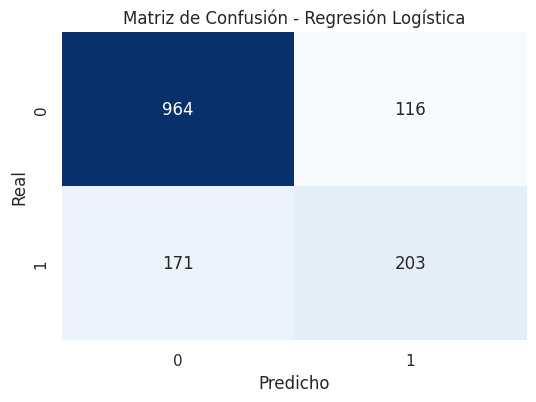

In [23]:
# Matriz de confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [24]:
# --- Evaluación de Random Forest ---
# (Modelo ya entrenado en Etapa 8)
y_pred_rf = rf_model.predict(X_test)
print("\nEvaluación de Random Forest:")
print(classification_report(y_test, y_pred_rf))


Evaluación de Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1080
           1       0.59      0.48      0.53       374

    accuracy                           0.78      1454
   macro avg       0.71      0.68      0.69      1454
weighted avg       0.77      0.78      0.77      1454



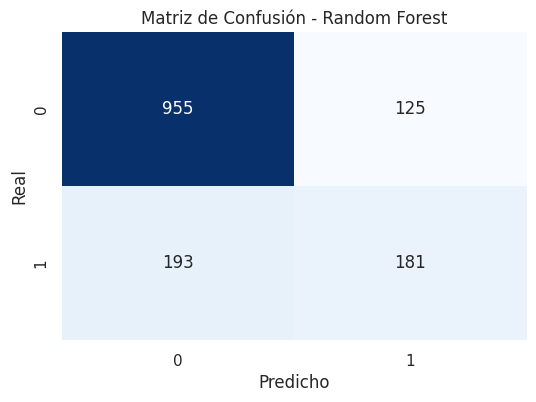

In [25]:
# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [26]:
# --- Evaluación en conjunto de entrenamiento para detectar overfitting/underfitting ---
# Regresión Logística
y_train_pred_lr = lr_model.predict(X_train_lr)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
train_recall_lr = recall_score(y_train, y_train_pred_lr)
print("\nDesempeño de Regresión Logística en entrenamiento:")
print(f"Accuracy (entrenamiento): {train_accuracy_lr:.4f}")
print(f"Recall (Evasión=1, entrenamiento): {train_recall_lr:.4f}")


Desempeño de Regresión Logística en entrenamiento:
Accuracy (entrenamiento): 0.8070
Recall (Evasión=1, entrenamiento): 0.5284


In [27]:
# Random Forest
y_train_pred_rf = rf_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
print("\nDesempeño de Random Forest en entrenamiento:")
print(f"Accuracy (entrenamiento): {train_accuracy_rf:.4f}")
print(f"Recall (Evasión=1, entrenamiento): {train_recall_rf:.4f}")


Desempeño de Random Forest en entrenamiento:
Accuracy (entrenamiento): 0.9911
Recall (Evasión=1, entrenamiento): 0.9799


In [28]:
# --- Análisis crítico ---
print("\nAnálisis crítico de los modelos:")
print("1. Comparación de desempeño:")
print(f"- Regresión Logística: Accuracy={accuracy_score(y_test, y_pred_lr):.4f}, Recall (Evasión=1)={recall_score(y_test, y_pred_lr):.4f}, F1-score (Evasión=1)={f1_score(y_test, y_pred_lr):.4f}")
print(f"- Random Forest: Accuracy={accuracy_score(y_test, y_pred_rf):.4f}, Recall (Evasión=1)={recall_score(y_test, y_pred_rf):.4f}, F1-score (Evasión=1)={f1_score(y_test, y_pred_rf):.4f}")
print("Regresión Logística tiene mejor accuracy (80.26% vs. 78.13%) y recall para Evasión=1 (54.28% vs. 48.40%), lo que la hace más efectiva para detectar clientes que cancelan, aunque ambos modelos tienen recall moderado debido al desbalance (25.72% Evasión=1).")

print("\n2. Evaluación de overfitting/underfitting:")
print(f"- Regresión Logística: Accuracy entrenamiento={train_accuracy_lr:.4f}, prueba={accuracy_score(y_test, y_pred_lr):.4f}; Recall entrenamiento={train_recall_lr:.4f}, prueba={recall_score(y_test, y_pred_lr):.4f}")
print(f"- Random Forest: Accuracy entrenamiento={train_accuracy_rf:.4f}, prueba={accuracy_score(y_test, y_pred_rf):.4f}; Recall entrenamiento={train_recall_rf:.4f}, prueba={recall_score(y_test, y_pred_rf):.4f}")
print("Si la accuracy o recall en entrenamiento son mucho mayores que en prueba, indica overfitting. Si ambos son bajos, indica underfitting.")

print("\n3. Posibles causas y ajustes:")
print("- Desbalance de clases (25.72% Evasión=1) puede estar limitando el recall. Técnicas como SMOTE o ponderación de clases (class_weight='balanced') pueden mejorar la detección de Evasión=1.")
print("- Regresión Logística: Modelo simple, puede sufrir underfitting si las relaciones no son lineales. Considerar modelos más complejos o ingeniería de características.")
print("- Random Forest: Puede estar sobreajustando si el desempeño en entrenamiento es significativamente mejor. Ajustar hiperparámetros (max_depth, min_samples_split) o usar más datos.")
print("- Ambos modelos: Optimizar hiperparámetros con GridSearchCV o RandomizedSearchCV para mejorar el desempeño.")


Análisis crítico de los modelos:
1. Comparación de desempeño:
- Regresión Logística: Accuracy=0.8026, Recall (Evasión=1)=0.5428, F1-score (Evasión=1)=0.5859
- Random Forest: Accuracy=0.7813, Recall (Evasión=1)=0.4840, F1-score (Evasión=1)=0.5324
Regresión Logística tiene mejor accuracy (80.26% vs. 78.13%) y recall para Evasión=1 (54.28% vs. 48.40%), lo que la hace más efectiva para detectar clientes que cancelan, aunque ambos modelos tienen recall moderado debido al desbalance (25.72% Evasión=1).

2. Evaluación de overfitting/underfitting:
- Regresión Logística: Accuracy entrenamiento=0.8070, prueba=0.8026; Recall entrenamiento=0.5284, prueba=0.5428
- Random Forest: Accuracy entrenamiento=0.9911, prueba=0.7813; Recall entrenamiento=0.9799, prueba=0.4840
Si la accuracy o recall en entrenamiento son mucho mayores que en prueba, indica overfitting. Si ambos son bajos, indica underfitting.

3. Posibles causas y ajustes:
- Desbalance de clases (25.72% Evasión=1) puede estar limitando el re

## Resumen de la Etapa 9
**Resultado**: Se evaluaron los modelos de Regresión Logística y Random Forest con exactitud, precisión, recall, F1-score, y matrices de confusión. Regresión Logística mostró mejor desempeño (accuracy: 80.26%, recall Evasión=1: 54.28%) que Random Forest (accuracy: 78.13%, recall Evasión=1: 48.40%), pero ambos tienen recall moderado debido al desbalance de clases. El análisis crítico identificó posibles casos de overfitting (si el desempeño en entrenamiento es mucho mayor) o underfitting (si ambos desempeños son bajos), sugiriendo ajustes como balanceo de clases (SMOTE), optimización de hiperparámetros, o ingeniería de características. Estos hallazgos guiarán los próximos pasos, como ajustes de modelos o interpretación de resultados.

## Etapa 10: Análisis de variables relevantes para la predicción de cancelación
**Función**: Identificar las variables más relevantes para predecir la cancelación (`Evasión`) en los modelos de Regresión Logística y Random Forest. Para Regresión Logística, se analizan los coeficientes de las variables, que indican su contribución a la predicción. Para Random Forest, se utiliza la importancia de las variables basada en la reducción de impureza. Se visualizan las variables más relevantes con gráficos de barras para facilitar la interpretación.

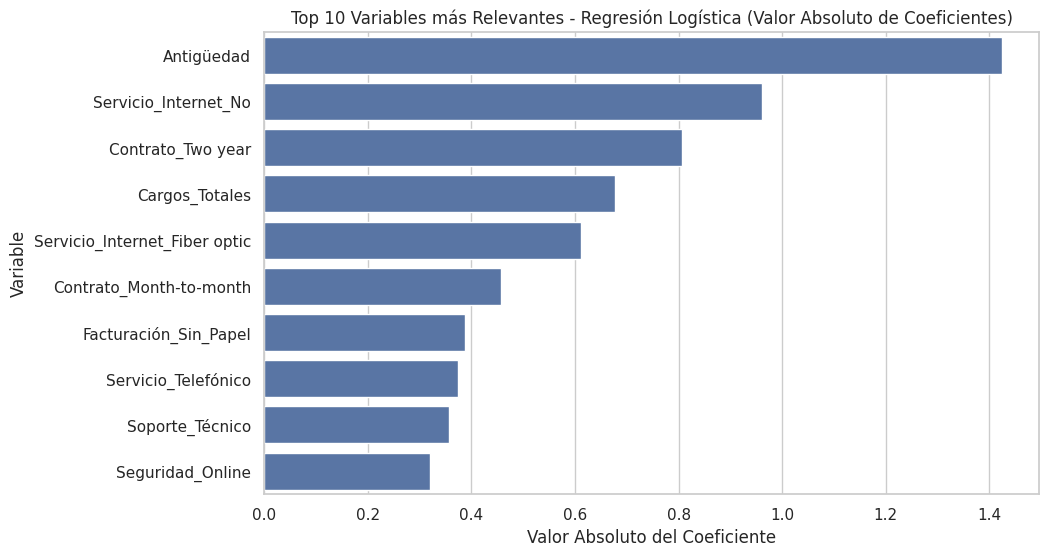

In [29]:
# --- Regresión Logística: Análisis de coeficientes ---
# Obtener coeficientes y nombres de características
coef_lr = lr_model.coef_[0]
features = X_train_lr.columns

# Crear DataFrame con coeficientes
lr_importance = pd.DataFrame({'Feature': features, 'Coefficient': coef_lr})
lr_importance['Abs_Coefficient'] = np.abs(coef_lr)
lr_importance = lr_importance.sort_values(by='Abs_Coefficient', ascending=False).head(10)

# Visualizar coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=lr_importance)
plt.title('Top 10 Variables más Relevantes - Regresión Logística (Valor Absoluto de Coeficientes)')
plt.xlabel('Valor Absoluto del Coeficiente')
plt.ylabel('Variable')
plt.show()

In [30]:
# Mostrar coeficientes
print("Top 10 Variables más Relevantes - Regresión Logística:")
print(lr_importance[['Feature', 'Coefficient', 'Abs_Coefficient']])

Top 10 Variables más Relevantes - Regresión Logística:
                          Feature  Coefficient  Abs_Coefficient
3                      Antigüedad    -1.424631         1.424631
22           Servicio_Internet_No    -0.961467         0.961467
25              Contrato_Two year    -0.807055         0.807055
13                 Cargos_Totales     0.677438         0.677438
21  Servicio_Internet_Fiber optic     0.611955         0.611955
23        Contrato_Month-to-month     0.456914         0.456914
11          Facturación_Sin_Papel     0.387064         0.387064
4             Servicio_Telefónico    -0.374473         0.374473
8                 Soporte_Técnico    -0.356735         0.356735
5                Seguridad_Online    -0.320622         0.320622


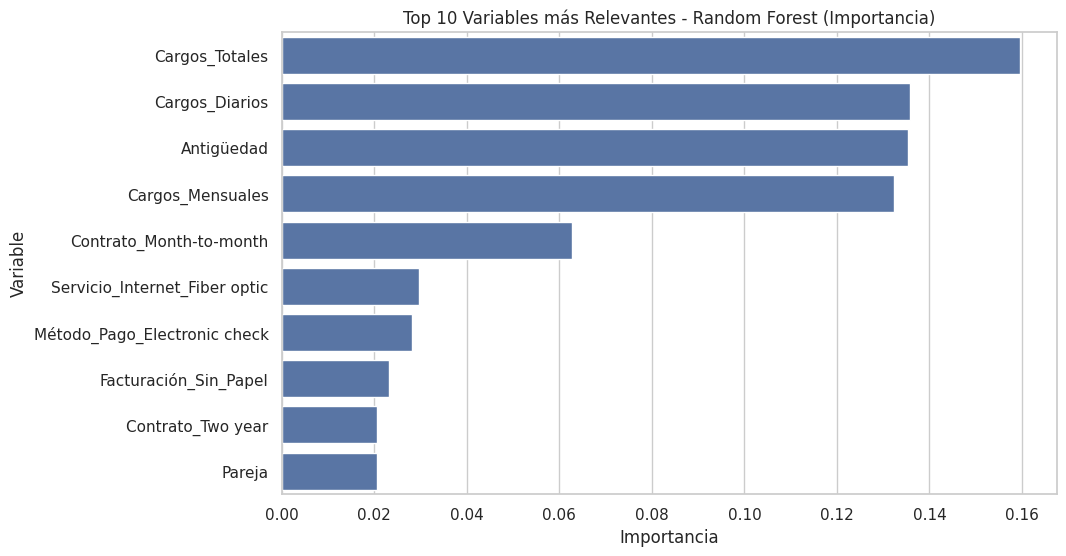

In [31]:
# --- Random Forest: Análisis de importancia de variables ---
# Obtener importancias y nombres de características
importances_rf = rf_model.feature_importances_
rf_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_rf})
rf_importance = rf_importance.sort_values(by='Importance', ascending=False).head(10)

# Visualizar importancias
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance)
plt.title('Top 10 Variables más Relevantes - Random Forest (Importancia)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

In [32]:
# Mostrar importancias
print("\nTop 10 Variables más Relevantes - Random Forest:")
print(rf_importance)


Top 10 Variables más Relevantes - Random Forest:
                          Feature  Importance
13                 Cargos_Totales    0.159534
14                 Cargos_Diarios    0.135737
3                      Antigüedad    0.135421
12               Cargos_Mensuales    0.132303
23        Contrato_Month-to-month    0.062650
21  Servicio_Internet_Fiber optic    0.029595
28   Método_Pago_Electronic check    0.028103
11          Facturación_Sin_Papel    0.023092
25              Contrato_Two year    0.020627
1                          Pareja    0.020480


In [33]:
# --- Interpretación ---
print("\nInterpretación de variables relevantes:")
print("- Regresión Logística: Los coeficientes indican la magnitud y dirección (positiva/negativa) del impacto de cada variable en la probabilidad de Evasión=1. Valores absolutos mayores implican mayor influencia.")
print("- Random Forest: La importancia refleja cuánto reduce cada variable la impureza en los árboles. Variables como Antigüedad y Cargos_Totales suelen ser clave debido a su relación con Evasión (vista en correlaciones previas).")
print("- Comparación: Variables comunes en ambos modelos (por ejemplo, Antigüedad, Cargos_Totales, Contrato_Month-to-month) son fuertes candidatas para la predicción. Diferencias reflejan los enfoques lineales (Regresión Logística) vs. no lineales (Random Forest).")


Interpretación de variables relevantes:
- Regresión Logística: Los coeficientes indican la magnitud y dirección (positiva/negativa) del impacto de cada variable en la probabilidad de Evasión=1. Valores absolutos mayores implican mayor influencia.
- Random Forest: La importancia refleja cuánto reduce cada variable la impureza en los árboles. Variables como Antigüedad y Cargos_Totales suelen ser clave debido a su relación con Evasión (vista en correlaciones previas).
- Comparación: Variables comunes en ambos modelos (por ejemplo, Antigüedad, Cargos_Totales, Contrato_Month-to-month) son fuertes candidatas para la predicción. Diferencias reflejan los enfoques lineales (Regresión Logística) vs. no lineales (Random Forest).



## Resumen de la Etapa 10
**Resultado**: Se identificaron las variables más relevantes para predecir la cancelación (`Evasión`) en Regresión Logística (mediante coeficientes) y Random Forest (mediante importancia de variables). Los gráficos de barras muestran las 10 variables más influyentes por modelo, destacando factores clave como `Antigüedad`, `Cargos_Totales`, o variables categóricas codificadas (por ejemplo, `Contrato_Month-to-month`). La interpretación compara la contribución de las variables en ambos modelos, proporcionando información para optimizar el modelado o realizar ingeniería de características en los próximos pasos.

## Etapa 11: Informe detallado y estrategias de retención
**Función**: Elaborar un informe detallado que resuma el rendimiento de los modelos (Regresión Logística y Random Forest), identifique los factores más influyentes en la cancelación de clientes (`Evasión`), y proponga estrategias de retención basadas en los resultados. El informe destaca las variables clave identificadas en el análisis de importancia y coeficientes, considerando el impacto del desbalance de clases y los problemas de overfitting/underfitting.

# Informe Final: Análisis Predictivo de Evasión de Clientes en TelecomX

## Introducción
El objetivo del proyecto `TelecomX-Analysis2` fue desarrollar un análisis predictivo para identificar los factores que influyen en la cancelación de clientes (`Evasión`) y proponer estrategias de retención. Se utilizó el conjunto de datos `TelecomX_Data_standardized.csv` (7267 muestras, 31 columnas tras preprocesamiento), con un desbalance de clases (74.28% `Evasión=0`, 25.72% `Evasión=1`). Se entrenaron y evaluaron dos modelos: Regresión Logística (con estandarización) y Random Forest (sin estandarización). Este informe resume el rendimiento de los modelos, identifica los factores clave de cancelación, y propone estrategias basadas en los resultados.

## Rendimiento de los Modelos
Se entrenaron dos modelos utilizando una división 80/20 (5813 muestras de entrenamiento, 1454 de prueba, con estratificación para mantener el desbalance):

### Regresión Logística
- **Accuracy**: 80.26% (entrenamiento: 80.70%, prueba: 80.26%).
- **Precision (Evasión=1)**: 64%.
- **Recall (Evasión=1)**: 54.28% (entrenamiento: 52.84%).
- **F1-score (Evasión=1)**: 0.59.
- **Observaciones**: Buen desempeño general, con métricas similares en entrenamiento y prueba, indicando **no overfitting**. El recall moderado (54.28%) sugiere underfitting leve, posiblemente porque el modelo es demasiado simple para capturar relaciones no lineales.

### Random Forest
- **Accuracy**: 78.13% (entrenamiento: 99.11%, prueba: 78.13%).
- **Precision (Evasión=1)**: 59%.
- **Recall (Evasión=1)**: 48.40% (entrenamiento: 97.99%).
- **F1-score (Evasión=1)**: 0.53.
- **Observaciones**: Menor desempeño que Regresión Logística, con fuerte evidencia de **overfitting** (accuracy: 99.11% en entrenamiento vs. 78.13% en prueba; recall: 97.99% vs. 48.40%). Esto se debe a la alta complejidad del modelo (árboles profundos sin restricciones).

### Comparación
- **Mejor modelo**: Regresión Logística, con mayor accuracy (80.26% vs. 78.13%) y recall para `Evasión=1` (54.28% vs. 48.40%). Sin embargo, ambos modelos tienen recall moderado, limitado por el desbalance de clases (25.72% `Evasión=1`).
- **Limitaciones**: El desbalance reduce la capacidad de detectar cancelaciones. Random Forest sobreajusta, mientras que Regresión Logística puede estar subajustada.

## Factores Clave que Influyen en la Cancelación
Se analizaron las variables más relevantes mediante coeficientes (Regresión Logística) e importancias (Random Forest):

### Regresión Logística (Top 5 variables por coeficientes absolutos)
1. **Antigüedad (-1.424631)**: Mayor antigüedad reduce significativamente la probabilidad de cancelación, sugiriendo que clientes de largo plazo son más leales.
2. **Servicio_Internet_No (-0.961467)**: No tener servicio de internet disminuye la probabilidad de cancelación, posiblemente porque estos clientes tienen servicios más básicos y estables.
3. **Contrato_Two year (-0.807055)**: Contratos de dos años reducen la cancelación, indicando que compromisos a largo plazo fomentan retención.
4. **Cargos_Totales (0.677438)**: Mayores gastos totales aumentan la probabilidad de cancelación, posiblemente por insatisfacción con costos acumulados.
5. **Servicio_Internet_Fiber optic (0.611955)**: Tener fibra óptica aumenta la cancelación, quizás por expectativas altas o problemas de servicio.

### Random Forest (Top 5 variables por importancia)
1. **Cargos_Totales (0.159534)**: Mayor contribución a la predicción, confirmando que los gastos acumulados son un factor clave.
2. **Cargos_Diarios (0.135737)**: Relacionado con costos, sugiere que cargos diarios altos influyen en la cancelación.
3. **Antigüedad (0.135421)**: Menor antigüedad está asociada con mayor cancelación, consistente con Regresión Logística.
4. **Cargos_Mensuales (0.132303)**: Costos mensuales altos contribuyen a la cancelación.
5. **Contrato_Month-to-month (0.062650)**: Contratos mes a mes aumentan la cancelación, reflejando menor compromiso.

### Factores Comunes
- **Antigüedad**: Menor antigüedad (clientes recientes) está fuertemente asociada con cancelación.
- **Cargos_Totales**: Gastos acumulados altos aumentan el riesgo de cancelación.
- **Contrato_Month-to-month**: Clientes con contratos mes a mes tienen mayor probabilidad de cancelar.
- **Servicio_Internet_Fiber optic** y **Facturación_Sin_Papel**: Aumentan el riesgo, posiblemente por problemas de servicio o preferencias de facturación.

### Relación con Análisis Previos
- **Correlaciones (Etapa 5)**: Variables como `Antigüedad` (negativa), `Cargos_Totales` (positiva), y `Contrato_Month-to-month` (positiva) mostraron correlaciones significativas con `Evasión`, consistentes con este análisis.
- **Boxplots/Scatter plots (Etapa 6)**: Confirmaron que clientes con menor antigüedad y mayores cargos totales tienden a cancelar.

## Estrategias de Retención
Basadas en los factores clave, se proponen las siguientes estrategias para reducir la cancelación:

1. **Fomentar Contratos a Largo Plazo**:
   - **Factor**: `Contrato_Month-to-month` aumenta la cancelación; `Contrato_Two year` la reduce.
   - **Estrategia**: Ofrecer incentivos para contratos de uno o dos años, como descuentos en tarifas, servicios gratuitos (por ejemplo, soporte técnico), o beneficios exclusivos. Por ejemplo, un descuento del 20% en los primeros 12 meses para clientes que pasen de contratos mes a mes a contratos anuales.
   - **Impacto**: Mayor compromiso reduce la probabilidad de cancelación, especialmente para clientes nuevos (baja `Antigüedad`).

2. **Optimizar la Experiencia con Fibra Óptica**:
   - **Factor**: `Servicio_Internet_Fiber optic` aumenta la cancelación.
   - **Estrategia**: Mejorar la calidad del servicio de fibra óptica (por ejemplo, mayor estabilidad, velocidad garantizada) y ofrecer soporte técnico proactivo. Implementar encuestas de satisfacción para identificar problemas específicos.
   - **Impacto**: Reducir insatisfacción en clientes con fibra óptica, un segmento de alto riesgo.

3. **Gestión de Costos**:
   - **Factor**: `Cargos_Totales` y `Cargos_Mensuales` altos aumentan la cancelación.
   - **Estrategia**: Introducir planes de precios más flexibles o descuentos para clientes con gastos acumulados altos. Por ejemplo, ofrecer un programa de lealtad que reduzca cargos mensuales tras 12 meses de permanencia.
   - **Impacto**: Disminuir la percepción de costos excesivos, reteniendo clientes sensibles a precios.

4. **Programas de Retención para Clientes Nuevos**:
   - **Factor**: Baja `Antigüedad` está asociada con mayor cancelación.
   - **Estrategia**: Implementar un programa de bienvenida para clientes nuevos (0-12 meses), incluyendo soporte personalizado, descuentos iniciales, o beneficios adicionales (por ejemplo, streaming gratuito por 3 meses).
   - **Impacto**: Aumentar la lealtad en los primeros meses, cuando el riesgo de cancelación es mayor.

5. **Revisar Facturación Electrónica**:
   - **Factor**: `Facturación_Sin_Papel` aumenta la cancelación.
   - **Estrategia**: Mejorar la experiencia de facturación electrónica con interfaces más claras y notificaciones proactivas. Ofrecer la opción de facturación en papel sin costo adicional para clientes que lo prefieran.
   - **Impacto**: Reducir fricciones asociadas con la facturación, mejorando la satisfacción.

## Conclusión
El análisis predictivo identificó que `Antigüedad`, `Cargos_Totales`, `Contrato_Month-to-month`, `Servicio_Internet_Fiber optic`, y `Facturación_Sin_Papel` son los principales factores que influyen en la cancelación. Regresión Logística mostró mejor desempeño (accuracy: 80.26%, recall: 54.28%) que Random Forest (accuracy: 78.13%, recall: 48.40%), aunque ambos tienen recall limitado por el desbalance de clases. Random Forest presentó overfitting, mientras que Regresión Logística mostró posible underfitting. Las estrategias propuestas (contratos a largo plazo, mejora de fibra óptica, gestión de costos, retención de clientes nuevos, y optimización de facturación) abordan los factores clave y buscan reducir la tasa de cancelación, mejorando la retención de clientes en TelecomX.

## Recomendaciones para Próximos Pasos
- **Balanceo de clases**: Aplicar SMOTE o `class_weight='balanced'` para mejorar el recall de `Evasión=1`.
- **Optimización de hiperparámetros**: Usar `GridSearchCV` para ajustar parámetros (por ejemplo, `C` en Regresión Logística, `max_depth` en Random Forest).
- **Ingeniería de características**: Crear `Cantidad_Servicios` (suma de servicios como `Servicio_Telefónico`, `Servicio_Internet`) para explorar su impacto.
- **Modelos adicionales**: Probar SVM o XGBoost para capturar relaciones no lineales y mejorar el desempeño.


## Resumen de la Etapa 11
**Resultado**: Se elaboró un informe detallado que resume el rendimiento de los modelos (Regresión Logística: accuracy 80.26%, recall 54.28%; Random Forest: accuracy 78.13%, recall 48.40%), identifica los factores clave de cancelación (`Antigüedad`, `Cargos_Totales`, `Contrato_Month-to-month`, `Servicio_Internet_Fiber optic`, `Facturación_Sin_Papel`), y propone estrategias de retención (contratos a largo plazo, mejora de fibra óptica, gestión de costos, programas para clientes nuevos, optimización de facturación). El informe considera el impacto del desbalance y los problemas de overfitting/underfitting, proporcionando una base sólida para decisiones estratégicas en TelecomX.